In [1]:
import pandas as pd
df = pd.read_csv('../../data/raw/listings.csv')
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [2]:
df.head(3)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5456,https://www.airbnb.com/rooms/5456,20250613040113,2025-06-13,city scrape,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,https://a0.muscache.com/pictures/14084884/b5a3...,8028,...,4.82,4.73,4.79,NaN,f,1,1,0,0,3.59
1,5769,https://www.airbnb.com/rooms/5769,20250613040113,2025-06-13,city scrape,NW Austin Room,NaN,Quiet neighborhood with lots of trees and good...,https://a0.muscache.com/pictures/23822033/ac94...,8186,...,4.94,4.77,4.92,NaN,f,1,0,1,0,1.65
2,6413,https://www.airbnb.com/rooms/6413,20250613040113,2025-06-14,previous scrape,Gem of a Studio near Downtown,"Great studio apartment, perfect a single perso...",Travis Heights is one of the oldest neighborho...,https://a0.muscache.com/pictures/hosting/Hosti...,13879,...,4.98,4.87,4.93,NaN,f,1,1,0,0,0.65


In [3]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_rows',None)
df.head(1).T
#pd.set_option('display.max_rows',60)
#pd.set_option('display.max_columns',20)

,0
id,5456
listing_url,https://www.airbnb.com/rooms/5456
scrape_id,20250613040113
last_scraped,2025-06-13
source,city scrape
name,"Walk to 6th, Rainey St and Convention Ctr"
description,Great central location for walking to Convent...
neighborhood_overview,My neighborhood is ideally located if you want...
picture_url,https://a0.muscache.com/pictures/14084884/b5a3...
host_id,8028


# SQL Practice

## Task 1: Simple WHERE (Warmup)
- **Business question: Show me all listings with 2+ bedrooms**
- *Your task: Filter the dataframe, show shape to confirm row count*

In [4]:
import sqlite3 as sq
conn = sq.connect(':memory:')
df.to_sql('austin_housing', conn, index=False)

t1query = """SELECT listing_url,
    bedrooms
    FROM austin_housing
    WHERE bedrooms >= 2
"""

t1result = pd.read_sql(t1query, conn)
print(t1result.shape)
t1result.head(3)

(8065, 2)


,listing_url,bedrooms
0,https://www.airbnb.com/rooms/13035,2.0
1,https://www.airbnb.com/rooms/40285,2.0
2,https://www.airbnb.com/rooms/51100,2.0


## Task 2: WHERE with Multiple Conditions
- **Business question: Show me entire home/apartments with 2+ bedrooms AND price under $200/night**
  
### Your task:
- Filter using TWO conditions (hint: use & for AND)
- Note: price is a string, you'll need to clean it first: df['price'].str.replace('$','').str.replace(',','').astype(float)

In [5]:
df['price'] = df['price'].str.replace('$','').str.replace(',','').astype(float)

t2query = """ SELECT listing_url,
    bedrooms,
    price
    FROM austin_housing
    WHERE bedrooms >= 2 AND price <= 200
"""
t2result = pd.read_sql(t2query, conn)
print(t2result.shape)
t2result.head(3)

(5969, 3)


,listing_url,bedrooms,price
0,https://www.airbnb.com/rooms/13035,2.0,$145.00
1,https://www.airbnb.com/rooms/40285,2.0,$514.00
2,https://www.airbnb.com/rooms/51100,2.0,$225.00


## Task 3: GROUP BY + Aggregation

**Business question: What's the average price by neighborhood (zip code)?**

### Your task:
- Group by neighbourhood_cleansed
- Show mean price
- Sort by average price (highest first)

In [6]:
df.to_sql('austin_housing', conn, index=False, if_exists='replace')

t3query = """ SELECT neighbourhood_cleansed,
    AVG(price) as avg_price
    FROM austin_housing
    GROUP BY neighbourhood_cleansed
    ORDER BY avg_price DESC
"""

t3result = pd.read_sql(t3query, conn)
t3result.head(10)

,neighbourhood_cleansed,avg_price
0,78738,6062.258621
1,78732,4516.045455
2,78701,1175.584838
3,78730,870.718750
4,78746,803.136842
5,78733,731.987013
6,78759,574.022388
7,78734,536.557432
8,78737,422.278107
9,78750,365.740000


## Task 4: GROUP BY + Multiple Aggregations

**Business question: For each property type, show me: count of listings, average price, average rating**

### Your task:
- Group by property_type
- Aggregate: count, mean price, mean rating
- Sort by count (most common property types first)

In [7]:
t4query = """ SELECT property_type,
    COUNT(listing_url) as listings_count,
    AVG(price) as avg_price,
    AVG(review_scores_rating) as avg_rating
    FROM austin_housing
    GROUP BY property_type
    ORDER BY listings_count DESC
"""

t4result = pd.read_sql(t4query, conn)
t4result.head(5)

,property_type,listings_count,avg_price,avg_rating
0,Entire home,5939,355.329755,4.873129
1,Entire rental unit,2975,132.189944,4.712326
2,Private room in home,1659,72.892562,4.842302
3,Entire condo,1148,173.317297,4.835015
4,Entire guesthouse,695,129.998261,4.928219


## Task 5: WHERE + GROUP BY + HAVING + ORDER BY (Full Combination)

**Business question: Which neighborhoods have at least 50 listings AND average price above $150/night? Show me sorted by average price.**

### Your task:
- Filter to relevant data first if needed (WHERE)
- Group by neighborhood (GROUP BY)
- Filter groups with 50+ listings AND avg price > $150 (HAVING)
- Sort by average price descending (ORDER BY)

In [8]:
t5query = """ SELECT neighbourhood_cleansed,
    COUNT(listing_url) as listings_count,
    AVG(price) as avg_price
    FROM austin_housing
    GROUP BY neighbourhood_cleansed
    HAVING listings_count >= 50 AND avg_price >= 150
    ORDER BY avg_price DESC
"""

t5result = pd.read_sql(t5query, conn)
t5result.head(5)

,neighbourhood_cleansed,listings_count,avg_price
0,78738,74,6062.258621
1,78732,79,4516.045455
2,78701,1246,1175.584838
3,78746,272,803.136842
4,78733,95,731.987013


## Task 6: Business Analysis (Putting It Together)

**Investor scenario: You want to identify the best neighborhoods for superhosts with high-revenue properties.**

### Your task:
- Filter: superhosts only (host_is_superhost == 't')
- Group by: neighborhood
- Show: count of listings, average estimated revenue, average rating
- Filter groups: at least 10 listings in that neighborhood
- Sort: by average revenue (highest first)

**This combines everything: WHERE, GROUP BY, aggregations, HAVING, ORDER BY**

In [9]:
t6query = """ SELECT neighbourhood_cleansed,
    COUNT(listing_url) as listings_count,
    AVG(estimated_revenue_l365d) as avg_est_rev,
    AVG(review_scores_rating) as avg_rating
    FROM austin_housing
    WHERE host_is_superhost == 't'
    GROUP BY neighbourhood_cleansed
    HAVING listings_count >= 10
    ORDER BY avg_est_rev DESC
"""

t6result = pd.read_sql(t6query, conn)
t6result.head(5)

,neighbourhood_cleansed,listings_count,avg_est_rev,avg_rating
0,78732,30,33503.464286,4.886538
1,78730,17,31234.941176,4.925333
2,78734,148,30779.246479,4.914752
3,78746,93,30617.647059,4.870769
4,78735,12,29534.727273,4.926667


In [10]:
conn.close()

In [11]:
print(df.shape)
df.head(1).T

(15187, 79)


,0
id,5456
listing_url,https://www.airbnb.com/rooms/5456
scrape_id,20250613040113
last_scraped,2025-06-13
source,city scrape
name,"Walk to 6th, Rainey St and Convention Ctr"
description,Great central location for walking to Convent...
neighborhood_overview,My neighborhood is ideally located if you want...
picture_url,https://a0.muscache.com/pictures/14084884/b5a3...
host_id,8028


# Block 2 - Visualizations

## Histogram

**Your task:**
- Create histogram of price with 50 bins
- Add vertical lines for mean (red, dashed) and median (green, dashed)
- Label axes and add title
- Add legend showing which line is mean vs median

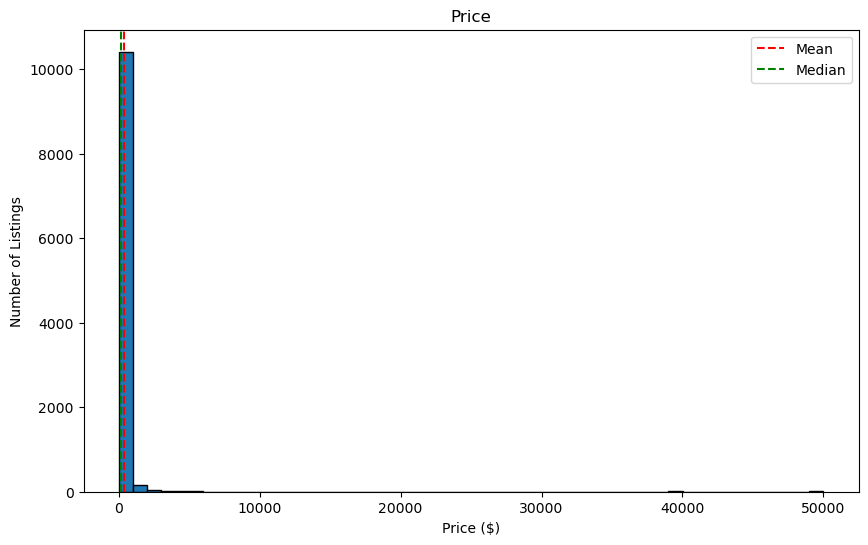

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=50, edgecolor='black')
plt.axvline(df['price'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['price'].median(), color='green', linestyle='--', label='Median')
plt.xlabel('Price ($)')
plt.ylabel('Number of Listings')
plt.title('Price')
plt.legend()
plt.show()

In [13]:
# See the distribution stats
df['price'].describe()

# Check the extremes
print(f"Max price: ${df['price'].max()}")
print(f"95th percentile: ${df['price'].quantile(0.95)}")
print(f"99th percentile: ${df['price'].quantile(0.99):.2f}")

# How many listings are above $1000/night?
print(f"Listings above $1000: {(df['price'] > 1000).sum()}")

Max price: $50000.0
95th percentile: $708.0
99th percentile: $2382.18
Listings above $1000: 298
